# NYC Motor Vehicle Crashes
## Data cleaning

In [1]:
import re

import pandas as pd
import numpy as np

from pandas_profiling import ProfileReport

In [39]:
pd.set_option("display.max_columns", None)

In [3]:
file_size = 10000
filename = f"data/data_{file_size}.csv"

dtypes = {"crash_date": str,
          "crash_time": str,
          "borough": str,
          "zip_code": str,
          "latitude": float, 
          "longitude": float, 
          "location": str,
          "on_street_name": str,
          "off_street_name": str,
          "cross_street_name": str,
          "number_of_persons_injured": str,
          "number_of_persons_killed": str,
          "number_of_pedestrians_injured": int,
          "number_of_pedestrians_killed": int,
          "number_of_cyclist_injured": int,
          "number_of_cyclist_killed": int,
          "number_of_motorist_injured": int,
          "number_of_motorist_killed": int,
          "contributing_factor_vehicle_1": str,
          "contributing_factor_vehicle_2": str,
          "contributing_factor_vehicle_3": str,
          "contributing_factor_vehicle_4": str,
          "contributing_factor_vehicle_5": str,
          "collision_id": int,
          "vehicle_type_code1": str,
          "vehicle_type_code2": str,
          "vehicle_type_code_3": str,
          "vehicle_type_code_4": str,
          "vehicle_type_code_5": str}

nyc_mvc = pd.read_csv(filename, dtype=dtypes)

## Data Profiling

In [4]:
prof = ProfileReport(nyc_mvc)
prof.to_file(output_file=f"profiling/profile_report_{file_size}_in.html")

## Check missing values

In [5]:
# Check how many rows of each attribute are NaN
nyc_mvc.isnull().sum()

crash_date                          0
crash_time                          0
borough                          3761
zip_code                         3761
latitude                          987
longitude                         987
location                          987
on_street_name                   2588
off_street_name                  5423
cross_street_name                7412
number_of_persons_injured           0
number_of_persons_killed            0
number_of_pedestrians_injured       0
number_of_pedestrians_killed        0
number_of_cyclist_injured           0
number_of_cyclist_killed            0
number_of_motorist_injured          0
number_of_motorist_killed           0
contributing_factor_vehicle_1      58
contributing_factor_vehicle_2    2533
contributing_factor_vehicle_3    8984
contributing_factor_vehicle_4    9734
contributing_factor_vehicle_5    9906
collision_id                        0
vehicle_type_code1                119
vehicle_type_code2               3492
vehicle_type

<AxesSubplot:>

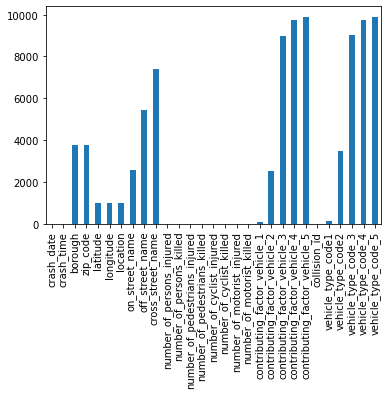

In [6]:
nyc_mvc.isnull().sum().plot.bar()

<AxesSubplot:>

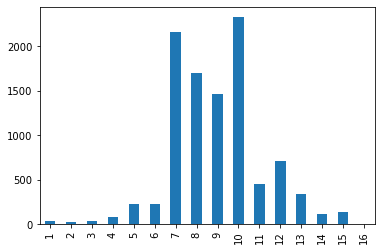

In [7]:
# Check missing value per row
missing_value_per_row = nyc_mvc.isnull().sum(axis=1)
cnt_missing_value = missing_value_per_row.value_counts().sort_index()
cnt_missing_value.plot.bar()

In [8]:
# Count rows with more than 50% of missing values
missing_limit = nyc_mvc.shape[1] / 2
len(missing_value_per_row[missing_value_per_row > missing_limit])

137

## Check duplicates

In [9]:
# Check for duplicates and delete them if exists
if(nyc_mvc.duplicated().any()):
    nyc_mvc.drop_duplicates(inplace=True)

## Standardization

##### Column name

In [10]:
nyc_mvc.rename(columns = {"vehicle_type_code1": "vehicle_type_code_1", 
                          "vehicle_type_code2": "vehicle_type_code_2"}, inplace = True)

##### String

In [11]:
# Remove leading and trailing withespaces
# and title if it's a string value
# and multiple space
# If value is empty return NaN
def standardization_str(x):
    if type(x) is str:
        value = x.strip().title()
        value = re.sub("\s+", ' ', value)
        return value if len(value) > 0 else np.NaN
    return x

In [12]:
nyc_mvc = nyc_mvc.applymap(standardization_str)

## Remove encoding error

##### On location

In [13]:
# Location = 0,0
nyc_mvc.longitude.replace(0, np.nan, inplace=True)
nyc_mvc.latitude.replace(0, np.nan, inplace=True)
nyc_mvc.location.replace("(0.0, 0.0)", np.nan, inplace=True)

##### On Street

In [14]:
# Only numeric value
replace_values = r"^\d+$"
replace_by = np.NaN

nyc_mvc.on_street_name = nyc_mvc.on_street_name.replace(replace_values, replace_by, regex=True)
nyc_mvc.off_street_name = nyc_mvc.off_street_name.replace(replace_values, replace_by, regex=True)
nyc_mvc.cross_street_name = nyc_mvc.cross_street_name.replace(replace_values, replace_by, regex=True)

In [15]:
# value with "&"
replace_values = r".*&.*"
replace_by = np.NaN

nyc_mvc.on_street_name = nyc_mvc.on_street_name.replace(replace_values, replace_by, regex=True)
nyc_mvc.off_street_name = nyc_mvc.off_street_name.replace(replace_values, replace_by, regex=True)
nyc_mvc.cross_street_name = nyc_mvc.cross_street_name.replace(replace_values, replace_by, regex=True)

##### On Vehicule type code

In [16]:
# UKN - UNKNOWN - UNKOWN
replace_values = ("UKN", "UNKOWN", "UNKNOWN") 
replace_by = np.NaN

nyc_mvc.vehicle_type_code_1 = nyc_mvc.vehicle_type_code_1.replace(replace_values, replace_by)
nyc_mvc.vehicle_type_code_2 = nyc_mvc.vehicle_type_code_2.replace(replace_values, replace_by)
nyc_mvc.vehicle_type_code_3 = nyc_mvc.vehicle_type_code_3.replace(replace_values, replace_by)
nyc_mvc.vehicle_type_code_4 = nyc_mvc.vehicle_type_code_4.replace(replace_values, replace_by)
nyc_mvc.vehicle_type_code_5 = nyc_mvc.vehicle_type_code_5.replace(replace_values, replace_by)

##### Check missing values after correction

In [17]:
# Check how many rows of each attribute are NaN
nyc_mvc.isnull().sum()

crash_date                          0
crash_time                          0
borough                          3761
zip_code                         3761
latitude                          994
longitude                         994
location                          994
on_street_name                   2590
off_street_name                  5427
cross_street_name                7412
number_of_persons_injured           0
number_of_persons_killed            0
number_of_pedestrians_injured       0
number_of_pedestrians_killed        0
number_of_cyclist_injured           0
number_of_cyclist_killed            0
number_of_motorist_injured          0
number_of_motorist_killed           0
contributing_factor_vehicle_1      58
contributing_factor_vehicle_2    2533
contributing_factor_vehicle_3    8984
contributing_factor_vehicle_4    9734
contributing_factor_vehicle_5    9906
collision_id                        0
vehicle_type_code_1               119
vehicle_type_code_2              3492
vehicle_type

## Missing value

In [18]:
# Check amout of unique value by column with missing values
for col in nyc_mvc:
    #if nyc_mvc[col].isna().sum() > 0:
        unique_values = nyc_mvc[col].unique()
        print(f"## {col} - {len(unique_values)} ####################")
        if(len(unique_values) < 100):
            print(nyc_mvc[col].unique())

## crash_date - 161 ####################
## crash_time - 1283 ####################
## borough - 6 ####################
[nan 'Queens' 'Bronx' 'Brooklyn' 'Manhattan' 'Staten Island']
## zip_code - 184 ####################
## latitude - 7249 ####################
## longitude - 6865 ####################
## location - 7628 ####################
## on_street_name - 1800 ####################
## off_street_name - 1818 ####################
## cross_street_name - 2535 ####################
## number_of_persons_injured - 10 ####################
['0' '1' '3' '2' '4' '5' '7' '6' '8' '10']
## number_of_persons_killed - 3 ####################
['0' '1' '2']
## number_of_pedestrians_injured - 5 ####################
[0 1 2 4 3]
## number_of_pedestrians_killed - 3 ####################
[0 1 2]
## number_of_cyclist_injured - 3 ####################
[0 1 2]
## number_of_cyclist_killed - 2 ####################
[0 1]
## number_of_motorist_injured - 10 ####################
[ 0  1  3  2  4  5  7  6  8 10]
## numbe

### Easy to fix

In [19]:
nyc_mvc.number_of_persons_injured = (nyc_mvc.number_of_cyclist_injured + 
                                     nyc_mvc.number_of_motorist_injured + 
                                     nyc_mvc.number_of_pedestrians_injured)

In [20]:
nyc_mvc.number_of_persons_killed = (nyc_mvc.number_of_cyclist_killed + 
                                    nyc_mvc.number_of_cyclist_killed + 
                                    nyc_mvc.number_of_cyclist_killed)

In [21]:
# Contributing factor vehicle
# NaN -> Unspecified
missing_cfv = "Unspecified"

nyc_mvc.contributing_factor_vehicle_1.fillna(missing_cfv, inplace=True)
nyc_mvc.contributing_factor_vehicle_2.fillna(missing_cfv, inplace=True)
nyc_mvc.contributing_factor_vehicle_3.fillna(missing_cfv, inplace=True)
nyc_mvc.contributing_factor_vehicle_4.fillna(missing_cfv, inplace=True)
nyc_mvc.contributing_factor_vehicle_5.fillna(missing_cfv, inplace=True)

In [22]:
# Vehicle type code
# NaN -> Unspecified
# + Rename column for naming standardization
missing_vtc = "Unspecified"

nyc_mvc.vehicle_type_code_1.fillna(missing_vtc, inplace=True)
nyc_mvc.vehicle_type_code_2.fillna(missing_vtc, inplace=True)
nyc_mvc.vehicle_type_code_3.fillna(missing_vtc, inplace=True)
nyc_mvc.vehicle_type_code_4.fillna(missing_vtc, inplace=True)
nyc_mvc.vehicle_type_code_5.fillna(missing_vtc, inplace=True)

### Hard to fix

##### Location

##### Street (on, off, cross)

In [23]:
# Only start numeric value
replace_values = r"^\d+\s"
replace_by = ''

nyc_mvc.cross_street_name = nyc_mvc.cross_street_name.replace(replace_values, 
                                                              replace_by, 
                                                              regex=True)

In [24]:
nyc_mvc.on_street_name.fillna(nyc_mvc.cross_street_name, inplace=True)

##### Zip code and borough

In [25]:
# Check how many rows of each attribute are NaN
nyc_mvc.isnull().sum()

crash_date                          0
crash_time                          0
borough                          3761
zip_code                         3761
latitude                          994
longitude                         994
location                          994
on_street_name                      2
off_street_name                  5427
cross_street_name                7412
number_of_persons_injured           0
number_of_persons_killed            0
number_of_pedestrians_injured       0
number_of_pedestrians_killed        0
number_of_cyclist_injured           0
number_of_cyclist_killed            0
number_of_motorist_injured          0
number_of_motorist_killed           0
contributing_factor_vehicle_1       0
contributing_factor_vehicle_2       0
contributing_factor_vehicle_3       0
contributing_factor_vehicle_4       0
contributing_factor_vehicle_5       0
collision_id                        0
vehicle_type_code_1                 0
vehicle_type_code_2                 0
vehicle_type

## Consolidation

In [26]:
def check_unique_values(df):
    for col in df:
        print(f"{col} - {len(df[col].unique())}")

In [27]:
check_unique_values(nyc_mvc)

crash_date - 161
crash_time - 1283
borough - 6
zip_code - 184
latitude - 7249
longitude - 6865
location - 7628
on_street_name - 2695
off_street_name - 1818
cross_street_name - 1519
number_of_persons_injured - 10
number_of_persons_killed - 2
number_of_pedestrians_injured - 5
number_of_pedestrians_killed - 3
number_of_cyclist_injured - 3
number_of_cyclist_killed - 2
number_of_motorist_injured - 10
number_of_motorist_killed - 3
contributing_factor_vehicle_1 - 50
contributing_factor_vehicle_2 - 30
contributing_factor_vehicle_3 - 15
contributing_factor_vehicle_4 - 8
contributing_factor_vehicle_5 - 6
collision_id - 10000
vehicle_type_code_1 - 88
vehicle_type_code_2 - 85
vehicle_type_code_3 - 26
vehicle_type_code_4 - 13
vehicle_type_code_5 - 8


#### Vehicle type code

In [28]:
# Search vehicle codes with frequency greater than 1% than the size of the df
pc_limit = 1

vehicle_codes_cnt = (nyc_mvc.vehicle_type_code_1.append(nyc_mvc.vehicle_type_code_2).
                                                 append(nyc_mvc.vehicle_type_code_3).
                                                 append(nyc_mvc.vehicle_type_code_4).
                                                 append(nyc_mvc.vehicle_type_code_5)).value_counts()

vehicle_codes_to_rm = vehicle_codes_cnt[(vehicle_codes_cnt.index != missing_vtc) &
                                        (vehicle_codes_cnt < len(nyc_mvc)*pc_limit/100)
                                       ].index
# Keep sure to not suppress the missing replacing value
if missing_vtc in vehicle_codes_to_rm:
    vehicle_codes_to_rm.remove(missing_vtc)


# Replace these codes by "Other"
other_mvc = "Other"
nyc_mvc.vehicle_type_code_1.replace(vehicle_codes_to_rm, other_mvc, inplace=True)
nyc_mvc.vehicle_type_code_2.replace(vehicle_codes_to_rm, other_mvc, inplace=True)
nyc_mvc.vehicle_type_code_3.replace(vehicle_codes_to_rm, other_mvc, inplace=True)
nyc_mvc.vehicle_type_code_4.replace(vehicle_codes_to_rm, other_mvc, inplace=True)
nyc_mvc.vehicle_type_code_5.replace(vehicle_codes_to_rm, other_mvc, inplace=True)

In [29]:
nyc_mvc.vehicle_type_code_1.value_counts()

Sedan                                  4943
Station Wagon/Sport Utility Vehicle    3303
Other                                   350
Taxi                                    281
Pick-Up Truck                           226
Box Truck                               170
Bike                                    154
Bus                                     132
Unspecified                             119
Tractor Truck Diesel                     92
Van                                      72
Motorcycle                               67
E-Bike                                   46
E-Scooter                                45
Name: vehicle_type_code_1, dtype: int64

##### Street

In [30]:
missing_street = "Unknown"
nyc_mvc.on_street_name.fillna(missing_street, inplace=True)
nyc_mvc.off_street_name.fillna(missing_street, inplace=True)

In [31]:
nyc_mvc.borough.fillna("Unknown", inplace=True)
nyc_mvc.zip_code.fillna("-1", inplace=True)

In [32]:
# Check how many rows of each attribute are NaN
nyc_mvc.isnull().sum()

crash_date                          0
crash_time                          0
borough                             0
zip_code                            0
latitude                          994
longitude                         994
location                          994
on_street_name                      0
off_street_name                     0
cross_street_name                7412
number_of_persons_injured           0
number_of_persons_killed            0
number_of_pedestrians_injured       0
number_of_pedestrians_killed        0
number_of_cyclist_injured           0
number_of_cyclist_killed            0
number_of_motorist_injured          0
number_of_motorist_killed           0
contributing_factor_vehicle_1       0
contributing_factor_vehicle_2       0
contributing_factor_vehicle_3       0
contributing_factor_vehicle_4       0
contributing_factor_vehicle_5       0
collision_id                        0
vehicle_type_code_1                 0
vehicle_type_code_2                 0
vehicle_type

## Drop unuseful row/column

In [33]:
# Rows without location
nyc_mvc.drop(nyc_mvc[nyc_mvc.location.isna()].index,
             inplace=True)

In [34]:
# Columns
nyc_mvc.drop(columns=["collision_id", 
                      "cross_street_name",
                      "location"],
             inplace=True)

## Dtype conversion

In [35]:
# Check dtypes
nyc_mvc.dtypes

crash_date                        object
crash_time                        object
borough                           object
zip_code                          object
latitude                         float64
longitude                        float64
on_street_name                    object
off_street_name                   object
number_of_persons_injured          int64
number_of_persons_killed           int64
number_of_pedestrians_injured      int64
number_of_pedestrians_killed       int64
number_of_cyclist_injured          int64
number_of_cyclist_killed           int64
number_of_motorist_injured         int64
number_of_motorist_killed          int64
contributing_factor_vehicle_1     object
contributing_factor_vehicle_2     object
contributing_factor_vehicle_3     object
contributing_factor_vehicle_4     object
contributing_factor_vehicle_5     object
vehicle_type_code_1               object
vehicle_type_code_2               object
vehicle_type_code_3               object
vehicle_type_cod

In [36]:
# Convert float to int
nyc_mvc.zip_code = nyc_mvc.zip_code.astype(int)
nyc_mvc.crash_date = pd.to_datetime(nyc_mvc.crash_date, format='%Y-%m-%d')
nyc_mvc.crash_time = pd.to_datetime(nyc_mvc.crash_time, format='%H:%M').dt.time

## Save output

In [37]:
nyc_mvc.to_csv(f"data/data_{file_size}_out.csv", index=False)

## Final Data Profiling

In [38]:
prof = ProfileReport(nyc_mvc)
prof.to_file(output_file=f"profiling/profile_report_{file_size}_out.html")